# <b>Extracting NOAA Data Part I</b>

For first part of extracting data from NOAA, we will only use a single file which contains daily values of a weather station within a single year.

For this example, we will extract an `*.op` file that contains data from Legaspi weather station for the year 2000.

## 1. Locating the data

Access the data by copying the following link to your file explorer address bar: ftp://ftp.ncdc.noaa.gov/pub/data/gsod/2000/.

Get any `gz` file from the link then download (by dragging and dropping) it to a local folder.
![ftp](FTP.png)

The `gz` file will contain a single `*.op` file that has the daily data from the specified weather station. Unzip this.
![op](op.png)

For this example, we will use year 2000 data for Legaspi weather station with station number `984440`.
Now, we will start the importing the data to python.

## 2. Importing the data
We extract data from the working directory using the `pandas` function `read_fwf` since the `*.op` is a fixed-width file.

In [3]:
import pandas as pd

path = 'C:/Users/Siegfred Codia/Documents/Acads/MS Stat/Thesis/Data/NOAA/daily extracted/2000/984440-99999-2000.op'

col_specification = [(0,6), (7, 12), (14, 18), (18,20),(20, 22), #stn, wban, yearmoda
                     (24,30), (31,33), # temperature
                     (35,41), (42,44), #dewp
                    (46,52), (53,55),  #slp
                     (57,63), (64,66), #stp
                    (68,73), (74,76), #visib
                     (78,83), (84,86), (88,93), (95,100),#wdsp, mxspd, gust
                     (102,108), (108,109), (110, 116), (116,117), #max,min temp
                     (118, 123), (123,124), (125,130), (132,138) # prcp, sndp, frshtt
                    ]
data = pd.read_fwf(path, colspecs=col_specification)

In [223]:
display(data)

,STN---,WBAN,YEAR,MO,DA,TEMP,Unnamed: 6,DEWP,Unnamed: 8,SLP,...,MXSPD,GUST,MAX,Unnamed: 20,MIN,Unnamed: 22,PRCP,Unnamed: 24,SNDP,FRSHTT
0,984440,99999,2000,1,1,79.8,7,76.3,7,1010.3,...,9.7,999.9,84.2,NaN,76.6,NaN,2.01,G,999.9,10000
1,984440,99999,2000,1,2,78.6,8,75.3,7,1010.5,...,5.8,999.9,84.6,NaN,75.2,*,0.39,G,999.9,10000
2,984440,99999,2000,1,3,78.4,5,75.1,5,1010.9,...,7.8,999.9,82.6,NaN,75.2,NaN,1.50,G,999.9,10000
3,984440,99999,2000,1,4,79.2,8,74.7,8,1011.8,...,9.7,999.9,85.6,NaN,75.6,NaN,0.16,G,999.9,10000
4,984440,99999,2000,1,5,81.4,6,76.6,6,1010.6,...,7.8,999.9,86.5,NaN,77.2,*,0.00,G,999.9,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,984440,99999,2000,12,26,78.7,5,76.4,5,1009.8,...,5.8,999.9,86.4,NaN,76.3,NaN,0.83,G,999.9,10000
321,984440,99999,2000,12,27,80.1,7,76.3,7,1010.2,...,3.9,999.9,86.7,NaN,75.6,NaN,1.73,G,999.9,10000
322,984440,99999,2000,12,28,76.8,5,74.2,5,1008.3,...,1.9,999.9,84.2,NaN,73.4,*,0.31,G,999.9,10000
323,984440,99999,2000,12,30,79.7,5,76.2,5,1004.0,...,3.9,999.9,87.8,NaN,73.8,NaN,0.00,I,999.9,0


In [4]:
# renaming the month, day, and Unnamed columns
data = data.rename(columns={'STN---':'STATION','MO':'MONTH', 'DA':'DAY','Unnamed: 6': 'TEMPcount', 
                            'Unnamed: 8': 'DEWPcount','Unnamed: 10':'SLPcount', 'Unnamed: 12':'STPcount', 
                            'Unnamed: 14':'VISIBcount', 'Unnamed: 16':'WDSPcount',
                            'Unnamed: 20':'MAXflag', 'Unnamed: 22': 'MINflag', 'Unnamed: 24':'PRCPflag'})

In [5]:
# getting only required columns
data = data[['STATION','YEAR', 'MONTH', 'DAY', 
            'PRCP', 'PRCPflag',
            'MIN', 'TEMP', 'MAX', 
            'DEWP', 'SLP', 'VISIB', 'WDSP']]

In [7]:
from IPython.display import HTML
def View(df):
    css = """<style>
    table { border-collapse: collapse; border: 3px solid #eee; }
    table tr th:first-child { background-color: #eeeeee; color: #333; font-weight: bold }
    table thead th { background-color: #eee; color: #000; }
    tr, th, td { border: 1px solid #ccc; border-width: 1px 0 0 1px; border-collapse: collapse;
    padding: 3px; font-family: monospace; font-size: 10px }</style>
    """
    s  = '<script type="text/Javascript">'
    s += 'var win = window.open("", "Title", "toolbar=no, location=no, directories=no, status=no, menubar=no, scrollbars=yes, resizable=yes, width=780, height=200, top="+(screen.height-400)+", left="+(screen.width-840));'
    s += 'win.document.body.innerHTML = \'' + (df.to_html() + css).replace("\n",'\\') + '\';'
    s += '</script>'
    return(HTML(s+css))

View(data)

In [8]:
display(data)

,STATION,YEAR,MONTH,DAY,PRCP,PRCPflag,MIN,TEMP,MAX,DEWP,SLP,VISIB,WDSP
0,984440,2000,1,1,2.01,G,76.6,79.8,84.2,76.3,1010.3,8.6,6.4
1,984440,2000,1,2,0.39,G,75.2,78.6,84.6,75.3,1010.5,8.9,3.9
2,984440,2000,1,3,1.50,G,75.2,78.4,82.6,75.1,1010.9,10.1,6.6
3,984440,2000,1,4,0.16,G,75.6,79.2,85.6,74.7,1011.8,9.9,5.8
4,984440,2000,1,5,0.00,G,77.2,81.4,86.5,76.6,1010.6,10.0,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,984440,2000,12,26,0.83,G,76.3,78.7,86.4,76.4,1009.8,8.5,3.1
321,984440,2000,12,27,1.73,G,75.6,80.1,86.7,76.3,1010.2,9.6,1.7
322,984440,2000,12,28,0.31,G,73.4,76.8,84.2,74.2,1008.3,10.4,0.5
323,984440,2000,12,30,0.00,I,73.8,79.7,87.8,76.2,1004.0,10.4,2.3


## 3. Cleaning the data
This involves the following:
<ul>
<li>removing invalid values</li>
<li>restructuring the data frame so that it includes all the dates</li>
<li>filling missing values (station and dates) </li>
</ul>
The imputation of missing values for the variables will be included in another discussion since it requires longer data and involves statistical techniques.

### <i>Invalid values</i>
We start by setting invalid data to NaN

In [9]:
# columns with invalid/null PRCP
display(data[(data.PRCP == 99.99)|(data.PRCPflag=='I')])

,STATION,YEAR,MONTH,DAY,PRCP,PRCPflag,MIN,TEMP,MAX,DEWP,SLP,VISIB,WDSP
25,984440,2000,1,27,99.99,NaN,75.9,79.1,83.5,70.7,1013.6,10.3,7.3
109,984440,2000,4,22,0.00,I,80.2,85.3,91.4,79.3,1009.5,10.6,2.6
110,984440,2000,4,24,0.00,I,77.0,85.4,90.9,78.9,1009.3,10.4,1.9
113,984440,2000,4,28,0.00,I,80.2,85.6,91.0,78.8,1010.6,10.5,2.7
116,984440,2000,5,14,0.00,I,75.9,83.7,90.7,79.0,1008.7,10.6,1.9
117,984440,2000,5,15,0.00,I,71.6,79.5,91.2,77.8,1008.0,10.4,1.0
119,984440,2000,5,17,0.00,I,78.8,84.1,90.9,78.3,1006.4,10.1,3.1
120,984440,2000,5,18,0.00,I,78.8,85.5,90.7,78.6,1006.4,10.6,5.5
122,984440,2000,5,20,0.00,I,78.4,84.0,92.5,78.3,1008.3,10.7,2.2
140,984440,2000,6,7,0.00,I,78.1,84.2,92.8,79.0,1010.2,10.1,1.1


In [10]:
# Cleaning data
import numpy as np
## setting Nulls on invalid values
df = data.replace({'PRCP': 99.99, 'MIN':9999.9, 'MAX':9999.9, 'TEMP':9999.9}, np.nan)
# precipitation based on PRCP.flag
df.loc[df.PRCPflag == 'I', 'PRCP'] = np.nan

### <i>Dates</i>
Now, we create a sequence of dates that we can merge the dataframe into

In [11]:
# Creating date column
import pandas as pd
df['DATE'] = pd.to_datetime( df[['YEAR', 'MONTH', 'DAY']])

# creating sequence of dates to merge
begin_date = '2000-01-01'
end_date   = '2000-12-31'
date = pd.DataFrame({'DATE':pd.date_range(start = begin_date, end = end_date)})

# merging
df = pd.merge(date, df, how = "left",on = 'DATE')

### <i>Filling blank cells</i>
Now that we restructured the dataframe, we need to fill in the cells with NaN. 

Only the columns `STATION`, `YEAR`, `MONTH`, and `DATE` will be included in this part because they can be easily determined without calculations.

In [12]:
#rows with missing data
df[df.isnull().any(1)]

,DATE,STATION,YEAR,MONTH,DAY,PRCP,PRCPflag,MIN,TEMP,MAX,DEWP,SLP,VISIB,WDSP
5,2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,2000-01-27,984440.0,2000.0,1.0,27.0,NaN,NaN,75.9,79.1,83.5,70.7,1013.6,10.3,7.3
88,2000-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,2000-04-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,2000-04-22,984440.0,2000.0,4.0,22.0,NaN,I,80.2,85.3,91.4,79.3,1009.5,10.6,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,2000-11-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
322,2000-11-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
354,2000-12-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,2000-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# For the following, no computation/ interpolation required 

# station name
STN = 984440
df['STATION'].fillna(STN, inplace = True)
df['STATION'] = df['STATION'].astype(int)

# Dates
df['YEAR'] = pd.DatetimeIndex(df['DATE']).year
df['MONTH'] = pd.DatetimeIndex(df['DATE']).month
df['DAY'] = pd.DatetimeIndex(df['DATE']).day

# setting date as row index
df = df.set_index('DATE')

## Final data

In [25]:
display(df)

,STATION,YEAR,MONTH,DAY,PRCP,PRCPflag,MIN,TEMP,MAX,DEWP,SLP,VISIB,WDSP
DATE,,,,,,,,,,,,,
2000-01-01,984440,2000,1,1,2.01,G,76.6,79.8,84.2,76.3,1010.3,8.6,6.4
2000-01-02,984440,2000,1,2,0.39,G,75.2,78.6,84.6,75.3,1010.5,8.9,3.9
2000-01-03,984440,2000,1,3,1.50,G,75.2,78.4,82.6,75.1,1010.9,10.1,6.6
2000-01-04,984440,2000,1,4,0.16,G,75.6,79.2,85.6,74.7,1011.8,9.9,5.8
2000-01-05,984440,2000,1,5,0.00,G,77.2,81.4,86.5,76.6,1010.6,10.0,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000-12-27,984440,2000,12,27,1.73,G,75.6,80.1,86.7,76.3,1010.2,9.6,1.7
2000-12-28,984440,2000,12,28,0.31,G,73.4,76.8,84.2,74.2,1008.3,10.4,0.5
2000-12-29,984440,2000,12,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the final data extracted, basic calculation can be used such as changing units from inches to mm.  
For the missing data points, different imputation methods will be employed, such as a simple linear interpolation or regression and time series models. However, this will require longer data, and will be discussed after the extraction of data from multiple years.

In [26]:
View(df)

## Quick Visualizations

### Rainfall

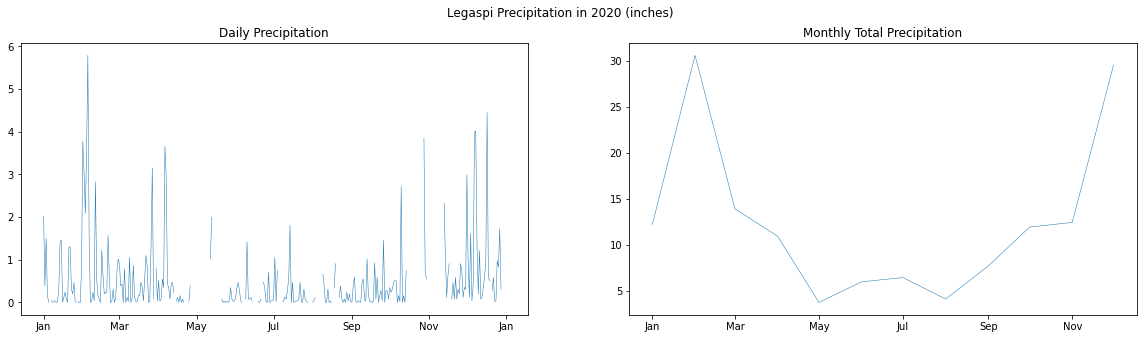

In [118]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.suptitle('Legaspi Precipitation in 2020 (inches)')

# daily rainfall
ax1.plot(df['PRCP'],linewidth=0.5,zorder=1)
ax1.set_title("Daily Precipitation")

# monthly total rainfall         
df_month = df.groupby(pd.Grouper(freq='MS')).sum()[['PRCP']]
ax2.plot(df_month['PRCP'],linewidth=0.5,zorder=1)
ax2.set_title("Monthly Total Precipitation")

# x-axis date formats
monthFmt = mdates.DateFormatter('%b')
ax1.xaxis.set_major_formatter(monthFmt)
_ = plt.xticks()
ax2.xaxis.set_major_formatter(monthFmt)
_ = plt.xticks()

plt.gcf().set_size_inches(20, 5)

### Temperature

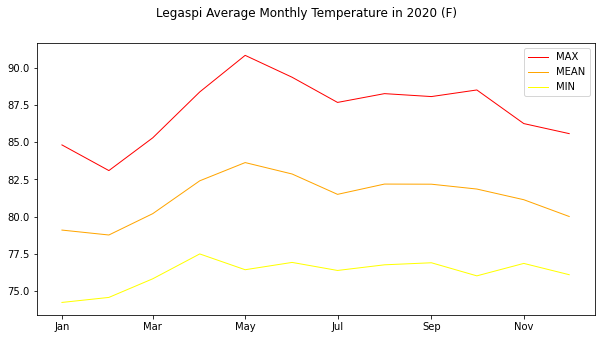

In [140]:
# monthly average mean temperature         
df_month_temp = df.groupby(pd.Grouper(freq='MS')).mean()[['TEMP','MIN','MAX']]


fig, ax1 = plt.subplots()

fig.suptitle('Legaspi Average Monthly Temperature in 2020 (F)')

ax1.plot(df_month_temp['MAX'],linewidth=1,color = "red", label = "MAX")
ax1.plot(df_month_temp['TEMP'],linewidth=1,color = "orange", label = "MEAN")
ax1.plot(df_month_temp['MIN'],linewidth=1,color = "yellow", label = "MIN")
plt.legend()

monthFmt = mdates.DateFormatter('%b')
ax1.xaxis.set_major_formatter(monthFmt)
_ = plt.xticks()

plt.gcf().set_size_inches(10, 5)